# Plate with hole in tension (step by step tutorial)

### Import fedoo

In [1]:
from fedoo import * #Import all the fedoo library

### Create and plot the mesh using simple build-in functions

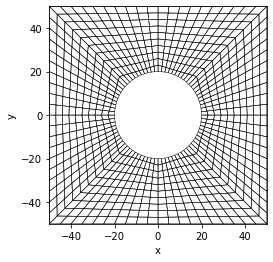

In [2]:
#Generate a simple structured mesh "Domain" (plate with a hole) using 'quad4' element.
meshObject = Mesh.HolePlateMesh(Nx=11, Ny=11, Lx=100, Ly=100, R=20, \
	ElementShape = 'quad4', sym=False, ID ="Domain") 

Util.meshPlot2d("Domain") #plot the mesh

### Define a mechanical constitutive law and the equation (weak formulation) to solve

To define the differential equation to solve :
* Create a modeling space with a specified dimension. Here a "2Dstress" modeling space is created that assume 2D plane stress assumption.
* Create a constitutive law: a simple elastic isotropic material with E = 2e5MPa et nu = 0.3 (steel)
* Create the equation to solve (weak formulation): mechanical equilibrium equation ("InternalForce")

In [3]:
#Define a 2D modeling space with plane stress assumption
Util.ProblemDimension("2Dstress") #2D problem with plane stress assumption

#Define an elastic isotropic material with E = 2e5MPa et nu = 0.3 (steel)
ConstitutiveLaw.ElasticIsotrop(2e5, 0.3, ID = 'ElasticLaw') 

#Create the weak formulation of the mechanical equilibrium equation
WeakForm.InternalForce("ElasticLaw", ID = "WeakForm") 

### Create a global Assembly 
In Fedoo, an Assembly is an object that compute the global assembled stiffness matrix and force vector using a FE interpolation.
"MeshChange = True" is specified to recompute some saved data that are mesh dependent at each time an assembly is loaded (not required for this specific problem). 

In [4]:
#Create a global assembly
Assembly.Create("WeakForm", "Domain", ID="Assembly", MeshChange = True) 

### Create a linear static problem

In [5]:
#Define a new linear static problem
pb = Problem.Static("Assembly")

### Apply some boundary conditions
* Create sets of nodes for boundary conditions. The "FindNodes" method of Mesh object is used to search nodes by loctation. 
* Create boundary condition ("Dirichlet" for displacement, "Neumann" for Force)
* pb.ApplyBoundaryCondition() is called to apply the boundary condition to the problem



In [6]:
#Definition of the set of nodes for boundary conditions
Xmin, Xmax = meshObject.GetBoundingBox() 
left  = meshObject.FindNodes('X',Xmin[0])  
right  = meshObject.FindNodes('X',Xmax[0])
bottom_left = meshObject.GetNearestNode(Xmin)

#Boundary conditions
pb.BoundaryCondition('Dirichlet','DispX',    -0.1  , left) 
pb.BoundaryCondition('Dirichlet','DispY',    0  , bottom_left) 
pb.BoundaryCondition('Dirichlet','DispX', 0.1, right) 
pb.ApplyBoundaryCondition()

### Solve the problem

In [9]:
pb.SetSolver('cg')
pb.Solve()

### Plot results

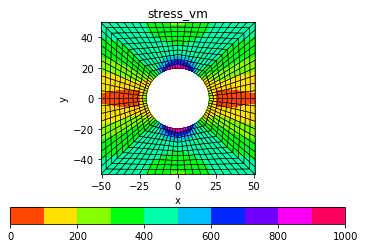

In [10]:
#---------- Post-Treatment ----------
#Get the stress tensor, strain tensor, and displacement (nodal values)
res_nd = pb.GetResults("Assembly", ['Stress_VM','Strain'], 'Node')
U = pb.GetDisp()

Util.fieldPlot2d("Assembly", disp = Problem.GetDisp(), dataID = 'stress', component='vm', data_min=None, data_max = None, scale_factor = 6, plot_edge = True, nb_level = 10, type_plot = "smooth")
# Util.fieldPlot2d("Assembly", disp = Problem.GetDisp(), dataID = 'disp', component=0, scale_factor = 6, plot_edge = True, nb_level = 6, type_plot = "smooth")